# Final Financial AI

금융AI

20175224 수학과 전경훈

In [1]:
!pip install yfinance

In [2]:
import yfinance as yf
from datetime import datetime 
import pandas as pd
import pandas_datareader as pdr
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# 데이터를 다운 받을 기간을 설정
start = datetime(2010,1,1)
end = datetime(2021,11,30)

1. 수익률 및 모멘텀 계산: 개별 주식의 월별 수익률 활용하여, 1개월, 3개원, 6개원, 9개월, 12개월 등의 모멘텀을 계산하시오. KOSPI지수와 임의의 한 주식을 선택하여 결과를 보여줄것.

In [4]:
# 주가 데이터를 다운 받아주세요. 

ksp = yf.download('^KS11',start,end) # KOSPI
ss = yf.download('005930.KS',start,end) # 삼성전자

ksp=ksp[['Close']].rename(columns={'Close':'Kospi_Close'})
ss=ss[['Close']].rename(columns={'Close':'Samsung_Close'})

price=pd.concat([ksp,ss],axis=1)
price2=pd.concat([ksp],axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
price=price.reset_index()
price

In [8]:
#Get all days within the sample period (데이터에 없는 날짜 채우기)
start_date = price['Date'].astype(str).iloc[0]
end_date = price['Date'].astype(str).iloc[-1]
 
date_all = pd.date_range(start_date, end_date, freq='D').to_frame().rename(columns={0:'Date'}).reset_index(drop=True)
 
#Merge with price data (데이터 병합)
price_all = pd.merge(date_all,price,how='left')
price_all

In [10]:
#the 'ffill' method propagates last valid observation forward (직전의 유효한 값으로 NaN 값 채우기)
price_all = price_all.fillna(method='ffill')
price_all

In [12]:
#Generate day of week variables (요일 이름 변수 생성)
price_all['Day_Name'] = price_all['Date'].dt.day_name()
#Generate end of month data (월말 날짜 생성)
month_end = pd.date_range(start_date, end_date, freq='M')
month_end

In [15]:
#Get only end of month prices (월말 가격 데이터 생성)
price_month = price_all[price_all['Date'].isin(month_end)].reset_index(drop=True)

In [17]:
#Set index and remove the Day Name columns (index 설정 및 Day_Name column 삭제)
price_month = price_month.set_index(['Date']).drop(['Day_Name'],axis=1)
 
#Monthly returns (월 수익률)
month_ret = price_month.pct_change(1).dropna()
month_ret #월별 수익률

In [20]:
# Momentum의 대리변수로 1개월, 3개월, 6개월, 9개원,12개월 간의 수익률을 계산함 
# (모멘텀: 주가 수익률의 상승세 정도 혹은 추이를 의미해요)

# pct_change() 수익률을 계산하는 함수. 
# period는 수익률을 계산하고자 하는 기간
# 100을 곱하면 단위가 %로 변한다.

# 모멘텀 계산 시, 시점 주의할 것: 현재 시점 포함시키면 곤란함 

month_ret2 = price_month.pct_change(2).dropna()
month_ret3 = price_month.pct_change(3).dropna()
month_ret6 = price_month.pct_change(6).dropna()
month_ret9 = price_month.pct_change(9).dropna()
month_ret12 = price_month.pct_change(12).dropna()

In [ ]:
month_ret6.head()

In [22]:
month_ret12.head()

,Kospi_Close,Samsung_Close
Date,,
2011-01-31,0.291620,0.251276
2011-02-28,0.216182,0.240591
2011-03-31,0.244469,0.139364
2011-04-30,0.258848,0.051826
2011-05-31,0.305389,0.162371


2. 포트폴리오 구성: 각 모멘텀 기준(k=3,6,9,12), 월별로, 최상위 주식 20개를 제외한 최상위 20개 주식(best portfolio), 중간순위 20개 주식(median portfolio), 최하위 30개 주식을 제외한 이후의 최하위 20개 주식(worst portfolio)으로 포트폴리오를 구성하고자 한다. 총 12개의 포트폴리오가 구성된다. 

In [23]:
!pip install -U finance-datareader
import FinanceDataReader as fdr

# KOSPI 종목 리스트를 확인
krx = fdr.StockListing('KOSPI')
print(len(krx))

4690


In [24]:
krx

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
6,152100,KOSPI,ARIRANG 200,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7,295820,KOSPI,ARIRANG 200동일가중,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8,253150,KOSPI,ARIRANG 200선물레버리지,NaN,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6362,069260,KOSPI,휴켐스,기타 화학제품 제조업,"화합물,화학제품 제조",2002-10-07,12월,이건호,http://www.huchems.com,서울특별시
6366,000540,KOSPI,흥국화재,보험업,손해보험,1974-12-05,12월,권중원,http://www.insurance.co.kr,서울특별시
6367,000547,KOSPI,흥국화재2우B,NaN,NaN,NaT,NaN,NaN,NaN,NaN
6368,000545,KOSPI,흥국화재우,NaN,NaN,NaT,NaN,NaN,NaN,NaN


(a) 각 모멘텀 기준으로 구성된 각 포트폴리오의 월별 수익률을 계산하시오. 그리고 각 포트폴리오의 월별 수익률(단순평균)을 다음과 같이 계산하시오.

In [25]:
#폴더 생성
!mkdir krx

하위 디렉터리 또는 파일 krx이(가) 이미 있습니다.


In [26]:
from concurrent import futures
import csv 

bad = []
krx_list=krx['Symbol'].tolist() #회사 Symbol만을 추출해서 list로 만든다.
print(len(krx_list))

4690


In [27]:
import os
#폴더 생성
if os.path.exists('krx') == False:
    os.mkdir('krx')

# file download
def download(krx_item):
    sym=krx_item
    df=fdr.DataReader(sym, start, end)
    dfnew=df.copy()
    dfnew['Symbol'] = sym
    dfnew.to_csv(f"krx/{sym}.csv", quoting=csv.QUOTE_MINIMAL)    


for krx_item in krx_list:
    sym=krx_item
    if os.path.exists(f"krx/{sym}.csv") == False:
        
        try:
            download(krx_item)
        except(ValueError):
            print("not downlaoad: ", krx_item)

not downlaoad:  58G638
not downlaoad:  58G639
not downlaoad:  58G640
not downlaoad:  58G641
not downlaoad:  58GB15
not downlaoad:  58GB16
not downlaoad:  58GB17
not downlaoad:  58GB18
not downlaoad:  58GB19
not downlaoad:  58GD05
not downlaoad:  58GD06
not downlaoad:  58GD07
not downlaoad:  58GD09
not downlaoad:  58GD10
not downlaoad:  58GD12
not downlaoad:  58GD13
not downlaoad:  58GD14
not downlaoad:  58GD15
not downlaoad:  58GD17
not downlaoad:  58GD18
not downlaoad:  58GD19
not downlaoad:  58GD20
not downlaoad:  58GD21
not downlaoad:  58GD22
not downlaoad:  58GD23
not downlaoad:  58GD24
not downlaoad:  58GD25
not downlaoad:  58GD26
not downlaoad:  58GD27
not downlaoad:  58GD28
not downlaoad:  58GD29
not downlaoad:  58GD30
not downlaoad:  58GD31
not downlaoad:  58GD32
not downlaoad:  58GD33
not downlaoad:  58GD34
not downlaoad:  58GD87
not downlaoad:  58GD89
not downlaoad:  58GD92
not downlaoad:  58GD95
not downlaoad:  58GD97
not downlaoad:  58GE06
not downlaoad:  58GE26
not downlao

not downlaoad:  58GK09
not downlaoad:  58GK10
not downlaoad:  58GK11
not downlaoad:  58GK12
not downlaoad:  58GK13
not downlaoad:  58GK14
not downlaoad:  58GK15
not downlaoad:  58GK16
not downlaoad:  58GK17
not downlaoad:  58GK18
not downlaoad:  58GK19
not downlaoad:  58GK20
not downlaoad:  58GK21
not downlaoad:  58GK22
not downlaoad:  58GK23
not downlaoad:  58GK24
not downlaoad:  58GK25
not downlaoad:  58GK26
not downlaoad:  58GK27
not downlaoad:  58GK28
not downlaoad:  58GK29
not downlaoad:  58GK30
not downlaoad:  58GK31
not downlaoad:  58GK32
not downlaoad:  58GK33
not downlaoad:  58GK34
not downlaoad:  58GK35
not downlaoad:  58GK36
not downlaoad:  58GK37
not downlaoad:  58GK38
not downlaoad:  58GK39
not downlaoad:  58GK40
not downlaoad:  58GK41
not downlaoad:  58GK42
not downlaoad:  58GK43
not downlaoad:  58GK44
not downlaoad:  58GK45
not downlaoad:  58GK46
not downlaoad:  58GK47
not downlaoad:  58GK48
not downlaoad:  58GK49
not downlaoad:  58GK50
not downlaoad:  58GK51
not downlao

not downlaoad:  58GR70
not downlaoad:  58GR71
not downlaoad:  58GR72
not downlaoad:  58GR73
not downlaoad:  58GR74
not downlaoad:  58GR75
not downlaoad:  58GR76
not downlaoad:  58GR77
not downlaoad:  58GR78
not downlaoad:  58GR79
not downlaoad:  58GR80
not downlaoad:  58GR81
not downlaoad:  58GR82
not downlaoad:  58GR83
not downlaoad:  58GR84
not downlaoad:  58GR85
not downlaoad:  58GR86
not downlaoad:  58GR87
not downlaoad:  58GR88
not downlaoad:  58GR89
not downlaoad:  58GR90
not downlaoad:  58GR91
not downlaoad:  58GR92
not downlaoad:  58GR93
not downlaoad:  58GR94
not downlaoad:  58GR95
not downlaoad:  58GR96
not downlaoad:  58GR97
not downlaoad:  58GR98
not downlaoad:  58GR99
not downlaoad:  58GS00
not downlaoad:  58GS02
not downlaoad:  58GS03
not downlaoad:  58GS04
not downlaoad:  58GS05
not downlaoad:  58GS06
not downlaoad:  58GS07
not downlaoad:  58GS08
not downlaoad:  58GS09
not downlaoad:  58GS10
not downlaoad:  58GS11
not downlaoad:  58GS12
not downlaoad:  58GS13
not downlao

not downlaoad:  52G891
not downlaoad:  52G892
not downlaoad:  52G893
not downlaoad:  52G904
not downlaoad:  52G905
not downlaoad:  52G913
not downlaoad:  52G930
not downlaoad:  52G931
not downlaoad:  52G938
not downlaoad:  52G959
not downlaoad:  52G975
not downlaoad:  52G976
not downlaoad:  52G988
not downlaoad:  52G998
not downlaoad:  52GA04
not downlaoad:  52GA05
not downlaoad:  52GA12
not downlaoad:  52GA97
not downlaoad:  52GA99
not downlaoad:  52GB01
not downlaoad:  52GB02
not downlaoad:  52GB03
not downlaoad:  52GB07
not downlaoad:  52GB08
not downlaoad:  52GB09
not downlaoad:  52GB10
not downlaoad:  52GB40
not downlaoad:  52GB46
not downlaoad:  52GB48
not downlaoad:  52GB54
not downlaoad:  52GB57
not downlaoad:  52GB62
not downlaoad:  52GB69
not downlaoad:  52GB72
not downlaoad:  52GB80
not downlaoad:  52GB81
not downlaoad:  52GB88
not downlaoad:  52GB90
not downlaoad:  52GB94
not downlaoad:  52GB95
not downlaoad:  52GB97
not downlaoad:  52GC10
not downlaoad:  52GC11
not downlao

not downlaoad:  52GK96
not downlaoad:  52GK97
not downlaoad:  52GK98
not downlaoad:  52GL00
not downlaoad:  52GL01
not downlaoad:  52GL02
not downlaoad:  52GL03
not downlaoad:  52GL04
not downlaoad:  52GL05
not downlaoad:  52GL06
not downlaoad:  52GL07
not downlaoad:  52GL08
not downlaoad:  52GL09
not downlaoad:  52GL10
not downlaoad:  52GL11
not downlaoad:  52GL12
not downlaoad:  52GL13
not downlaoad:  52GL14
not downlaoad:  52GL15
not downlaoad:  52GL16
not downlaoad:  52GL17
not downlaoad:  52GL18
not downlaoad:  52GL19
not downlaoad:  52GL20
not downlaoad:  52GL21
not downlaoad:  52GL22
not downlaoad:  52GL23
not downlaoad:  52GL24
not downlaoad:  52GL25
not downlaoad:  52GL26
not downlaoad:  52GL27
not downlaoad:  52GL28
not downlaoad:  52GL29
not downlaoad:  52GL30
not downlaoad:  52GL31
not downlaoad:  52GL32
not downlaoad:  52GL33
not downlaoad:  52GL34
not downlaoad:  52GL35
not downlaoad:  52GL37
not downlaoad:  52GL38
not downlaoad:  52GL40
not downlaoad:  52GL41
not downlao

not downlaoad:  52GP59
not downlaoad:  52GP60
not downlaoad:  52GP61
not downlaoad:  52GP62
not downlaoad:  52GP63
not downlaoad:  52GP64
not downlaoad:  52GP65
not downlaoad:  52GP66
not downlaoad:  52GP67
not downlaoad:  52GP68
not downlaoad:  52GP69
not downlaoad:  52GP70
not downlaoad:  52GP71
not downlaoad:  52GP72
not downlaoad:  52GP73
not downlaoad:  52GP74
not downlaoad:  52GP75
not downlaoad:  52GP76
not downlaoad:  52GP77
not downlaoad:  52GP78
not downlaoad:  52GP79
not downlaoad:  52GP80
not downlaoad:  52GP81
not downlaoad:  52GP82
not downlaoad:  52GP83
not downlaoad:  52GP84
not downlaoad:  52GP85
not downlaoad:  52GP86
not downlaoad:  52GP87
not downlaoad:  52GP88
not downlaoad:  52GP89
not downlaoad:  52GP90
not downlaoad:  52GP91
not downlaoad:  52GP92
not downlaoad:  52GP93
not downlaoad:  52GP94
not downlaoad:  52GP95
not downlaoad:  52GP96
not downlaoad:  52GP97
not downlaoad:  52GP98
not downlaoad:  52GP99
not downlaoad:  52GQ00
not downlaoad:  52GQ01
not downlao

not downlaoad:  57GN84
not downlaoad:  57GN85
not downlaoad:  57GN86
not downlaoad:  57GN87
not downlaoad:  57GN88
not downlaoad:  57GN89
not downlaoad:  57GN90
not downlaoad:  57GN91
not downlaoad:  57GN92
not downlaoad:  57GN93
not downlaoad:  57GN94
not downlaoad:  57GN95
not downlaoad:  57GN96
not downlaoad:  57GN97
not downlaoad:  57GN98
not downlaoad:  57GN99
not downlaoad:  57GP00
not downlaoad:  57GP01
not downlaoad:  57GP02
not downlaoad:  57GP03
not downlaoad:  57GP04
not downlaoad:  57GP05
not downlaoad:  57GP06
not downlaoad:  57GP07
not downlaoad:  57GP08
not downlaoad:  57GP09
not downlaoad:  57GP10
not downlaoad:  57GP11
not downlaoad:  57GP12
not downlaoad:  57GP13
not downlaoad:  57GP14
not downlaoad:  57GP15
not downlaoad:  57GP16
not downlaoad:  57GP17
not downlaoad:  57GP18
not downlaoad:  57GP19
not downlaoad:  57GP20
not downlaoad:  57GP21
not downlaoad:  57GP22
not downlaoad:  57GP23
not downlaoad:  57GP24
not downlaoad:  57GP25
not downlaoad:  57GP26
not downlao

not downlaoad:  57GW13
not downlaoad:  57GW14
not downlaoad:  57GW15
not downlaoad:  57GW16
not downlaoad:  57GW17
not downlaoad:  57GW41
not downlaoad:  57GW42
not downlaoad:  57GW43
not downlaoad:  57GW44
not downlaoad:  57GW45
not downlaoad:  57GW46
not downlaoad:  57GW47
not downlaoad:  57GW48
not downlaoad:  57GW49
not downlaoad:  57GW50
not downlaoad:  57GW51
not downlaoad:  57GW52
not downlaoad:  57GW53
not downlaoad:  57GW54
not downlaoad:  57GW55
not downlaoad:  57GW56
not downlaoad:  57GW57
not downlaoad:  57GW58
not downlaoad:  57GW59
not downlaoad:  57GW60
not downlaoad:  57GW61
not downlaoad:  57GW62
not downlaoad:  57GW63
not downlaoad:  57GW64
not downlaoad:  57GW65
not downlaoad:  57GW66
not downlaoad:  57GW67
not downlaoad:  57GW68
not downlaoad:  57GW69
not downlaoad:  57GW70
not downlaoad:  57GW71
not downlaoad:  57GW72
not downlaoad:  57GW73
not downlaoad:  57GW74
not downlaoad:  57GW75
not downlaoad:  57GW76
not downlaoad:  57GW77
not downlaoad:  57GW78
not downlao

not downlaoad:  57GZ93
not downlaoad:  57GZ94
not downlaoad:  57GZ95
not downlaoad:  57GZ96
not downlaoad:  57GZ97
not downlaoad:  57GZ98
not downlaoad:  57GZ99


In [28]:
print(len(krx_list))
print(len(os.listdir('krx')))

krx_list = [file.split('.')[0] for file in os.listdir('krx')]

4690
1834


In [29]:
remove_list=[] 

stocks=pd.DataFrame() 
for krx_item in krx_list:
  tmp=pd.read_csv(f"krx/{krx_item}.csv",parse_dates=True)
  if ('Close' in tmp.columns) and ('Date' in tmp.columns):
    tmp.set_index(tmp['Date'],inplace=True,drop=False) 
    tmp_close=tmp['Close'].rename(krx_item)
    stocks=pd.concat([stocks,tmp_close],axis=1,sort=True) 
  else:
    print("delete : ",{krx_item})
    remove_list.append(krx_item)

for remove_item in remove_list:
  krx_list.remove(remove_item)

stocks = stocks.loc[:,~stocks.columns.duplicated()]

delete :  {'00004217'}
delete :  {'00064217'}
delete :  {'00121218'}
delete :  {'00306217'}
delete :  {'0048721A'}
delete :  {'00532219'}
delete :  {'01193219'}
delete :  {'03402217'}
delete :  {'0340221B'}
delete :  {'04267217'}
delete :  {'1806421A'}
delete :  {'21433218'}
delete :  {'70101781'}
delete :  {'70101786'}
delete :  {'70101B95'}
delete :  {'70101B96'}
delete :  {'70101B99'}
delete :  {'70101B9A'}
delete :  {'70101BA2'}
delete :  {'70101BA7'}
delete :  {'70101BB1'}
delete :  {'70102786'}
delete :  {'70102B96'}
delete :  {'70102BA2'}
delete :  {'70103B96'}
delete :  {'70901B95'}
delete :  {'70902B95'}
delete :  {'70903B95'}
delete :  {'71201B97'}
delete :  {'71201B98'}
delete :  {'71202B98'}
delete :  {'71203B98'}
delete :  {'71204B98'}
delete :  {'71205B98'}
delete :  {'71206B98'}
delete :  {'71207B98'}
delete :  {'71208B98'}
delete :  {'71901B92'}
delete :  {'71901B96'}
delete :  {'71901B9B'}
delete :  {'71901BB4'}
delete :  {'71902B92'}
delete :  {'71902B96'}
delete :  {

In [30]:
stocks

,000020,000040,000050,000060,000070,000075,000080,000087,000100,000105,...,700001,700002,700003,700004,700007,700008,700009,700010,900140,950210
2010-01-04,7520,3635,9921,8696,46517,28125,39950,NaN,27049,20468,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,7500,3604,9959,8865,46257,28050,40200,NaN,27202,21725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,7350,3696,10225,9130,45894,28200,39150,NaN,27510,21725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,7210,3696,10187,9167,45167,27750,37600,NaN,27279,20468,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,7240,3787,10035,9058,45063,28350,36900,NaN,27049,20468,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-24,13450,942,13600,30750,101000,69300,32700,19850.0,59700,58400,...,7885.0,10595.0,9140.0,7575.0,10385.0,9530.0,20370.0,19445.0,3790.0,25100.0
2021-11-25,13450,905,13650,31250,99300,69700,31850,19650.0,59300,58400,...,7900.0,10535.0,9140.0,7605.0,10430.0,9480.0,20840.0,19025.0,3735.0,24150.0
2021-11-26,13900,900,13400,31800,96600,67100,30950,19200.0,59300,58400,...,7905.0,10425.0,9150.0,7620.0,10345.0,9565.0,19995.0,19795.0,3610.0,24200.0
2021-11-29,13850,884,13200,31200,95900,66800,30300,18850.0,58900,58000,...,7905.0,10215.0,9045.0,7600.0,10220.0,9685.0,19555.0,20105.0,3520.0,27850.0


In [34]:
stocks.index = pd.to_datetime(stocks.index)
stocks['date'] = stocks.index
stocks['year'] = stocks.index.year
stocks['month'] = stocks.index.month
stocks['day'] = stocks.index.day
month_max = pd.DataFrame(stocks.groupby(['year', 'month'])['day'].max()).reset_index()
month_max

,year,month,day
0,2010,1,29
1,2010,2,26
2,2010,3,31
3,2010,4,30
4,2010,5,31
...,...,...,...
138,2021,7,30
139,2021,8,31
140,2021,9,30
141,2021,10,29


In [35]:
stocks_month = pd.DataFrame([])

for (index, date) in month_max.iterrows():
    year, month, day = date.to_list()
    t = pd.to_datetime(str(year) + '-' + str(month) + '-' + str(day), format='%Y-%m-%d')
    
    stocks_month = stocks_month.append(stocks[stocks['date'] == t], ignore_index=True)

In [36]:
stocks_month['date'] = stocks_month['date']
stocks_month =stocks_month.set_index(stocks_month['date'])
stocks_month

,000020,000040,000050,000060,000070,000075,000080,000087,000100,000105,...,700007,700008,700009,700010,900140,950210,date,year,month,day
date,,,,,,,,,,,,,,,,,,,,,
2010-01-29,5800,3482,8933,8925,41221,26400,38050,NaN,26127,19951,...,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-29,2010,1,29
2010-02-26,5980,4704,8515,9058,40287,29925,35550,NaN,25051,20099,...,NaN,NaN,NaN,NaN,NaN,NaN,2010-02-26,2010,2,26
2010-03-31,6000,5284,9275,8877,42104,30000,35550,NaN,26510,19951,...,NaN,NaN,NaN,NaN,NaN,NaN,2010-03-31,2010,3,31
2010-04-30,5980,6200,8781,8744,42363,31500,35000,NaN,24590,19434,...,NaN,NaN,NaN,NaN,NaN,NaN,2010-04-30,2010,4,30
2010-05-31,5400,5284,7944,9239,49216,35250,33050,NaN,22515,17587,...,NaN,NaN,NaN,NaN,NaN,NaN,2010-05-31,2010,5,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-30,14650,1235,13600,25500,109000,71000,34450,21300.0,61600,59600,...,NaN,NaN,NaN,NaN,3460.0,27900.0,2021-07-30,2021,7,30
2021-08-31,14850,1125,13650,26550,105500,71200,33350,21150.0,62500,59700,...,NaN,NaN,NaN,NaN,3505.0,31900.0,2021-08-31,2021,8,31
2021-09-30,17850,1015,13800,30550,111500,69400,33150,20700.0,61500,58100,...,NaN,NaN,NaN,NaN,3240.0,28800.0,2021-09-30,2021,9,30


In [38]:
stocks_month = stocks_month.drop(['month','year','day','date'], axis=1) #불필요한 columns 삭제

In [40]:
for column in stocks_month.columns:
    stocks_month.loc[:, [column]].astype('float64')

In [41]:
stocks_month_close = stocks_month.shift(1)
stocks_earn = 100 * np.log((stocks_month / stocks_month_close).astype(np.float64))
stocks_earn

,000020,000040,000050,000060,000070,000075,000080,000087,000100,000105,...,700001,700002,700003,700004,700007,700008,700009,700010,900140,950210
date,,,,,,,,,,,,,,,,,,,,,
2010-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-26,5800.0,3482.0,8933.0,8925.0,41221.0,26400.0,38050.0,NaN,26127.0,19951.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-31,5980.0,4704.0,8515.0,9058.0,40287.0,29925.0,35550.0,NaN,25051.0,20099.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-30,6000.0,5284.0,9275.0,8877.0,42104.0,30000.0,35550.0,NaN,26510.0,19951.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-31,5980.0,6200.0,8781.0,8744.0,42363.0,31500.0,35000.0,NaN,24590.0,19434.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-30,15650.0,1225.0,14250.0,20400.0,110500.0,74900.0,37700.0,23000.0,63100.0,60700.0,...,7595.0,11565.0,10080.0,NaN,NaN,NaN,NaN,NaN,3750.0,33000.0
2021-08-31,14650.0,1235.0,13600.0,25500.0,109000.0,71000.0,34450.0,21300.0,61600.0,59600.0,...,7655.0,11235.0,10360.0,NaN,NaN,NaN,NaN,NaN,3460.0,27900.0
2021-09-30,14850.0,1125.0,13650.0,26550.0,105500.0,71200.0,33350.0,21150.0,62500.0,59700.0,...,7710.0,11105.0,10305.0,9790.0,NaN,NaN,NaN,NaN,3505.0,31900.0


In [43]:
momentumList=['momentum_1','momentum_3','momentum_6','momentum_9','momentum_12']

momentum_1 = stocks_month_close.pct_change(periods = 1)
momentum_3 = stocks_month_close.pct_change(periods = 3)
momentum_6 = stocks_month_close.pct_change(periods = 6)
momentum_9 = stocks_month_close.pct_change(periods = 9)
momentum_12 = stocks_month_close.pct_change(periods = 12)

In [44]:
tStartDay=pd.to_datetime('2010-1-1', format='%Y-%m-%d')
tEndDay=pd.to_datetime('2021-11-30', format='%Y-%m-%d')

In [45]:
momentumList=['best_3','best_6','best_9','best_12','median_3','median_6','median_9','median_12',
              'worst_3','worst_6','worst_9','worst_12']
new_data=pd.DataFrame(0,columns=momentumList,index=stocks_month.index)

In [46]:
def MeanEarn_best20(momentumDF,columname,idx):

  top20=momentumDF.loc[idx].sort_values(ascending = False).index[20:40]
    
  sum = 0.0
  for tStock in top20:
    value = momentumDF.loc[idx:].iloc[1].loc[tStock]
    if np.isnan(value) == False:
        sum += value
        
  mean= sum/20 
  new_data.loc[idx,columname]=mean

for idx, row in stocks_month.iterrows():
    if idx>=tStartDay and idx<tEndDay:
     
      MeanEarn_best20(momentum_3,momentumList[0],idx)
      MeanEarn_best20(momentum_6,momentumList[1],idx)
      MeanEarn_best20(momentum_9,momentumList[2],idx)
      MeanEarn_best20(momentum_12,momentumList[3],idx)

In [47]:
def MeanEarn_median20(momentumDF,columname,idx):
    
  median = len(momentumDF) // 2
  median20=momentumDF.loc[idx].sort_values(ascending=False).index[median-10:median+10] 
  sum = 0.0
  for tStock in median20:
    value = momentumDF.loc[idx:].iloc[1].loc[tStock]
    if np.isnan(value) == False:
        sum += momentumDF.loc[idx:].iloc[1].loc[tStock] 
  
  mean= sum/20 
  new_data.loc[idx,columname]=mean

for idx, row in stocks_month.iterrows():
    if idx>=tStartDay and idx<tEndDay:
     
      MeanEarn_median20(momentum_3,momentumList[4],idx)
      MeanEarn_median20(momentum_6,momentumList[5],idx)
      MeanEarn_median20(momentum_9,momentumList[6],idx)
      MeanEarn_median20(momentum_12,momentumList[7],idx)

In [48]:
def MeanEarn_worst20(momentumDF,columname,idx):

  worst20=momentumDF.loc[idx].sort_values(ascending = True).index[30:50] 

  sum = 0
  for tStock in worst20:
    value = momentumDF.loc[idx:].iloc[1].loc[tStock]
    if np.isnan(value) == False:
        sum += value

  mean= sum/20
  new_data.loc[idx,columname]=mean

for idx, row in stocks_month.iterrows():
    if idx>=tStartDay and idx<tEndDay:
     
      MeanEarn_worst20(momentum_3,momentumList[8],idx)
      MeanEarn_worst20(momentum_6,momentumList[9],idx)
      MeanEarn_worst20(momentum_9,momentumList[10],idx)
      MeanEarn_worst20(momentum_12,momentumList[11],idx)

In [49]:
new_data

,best_3,best_6,best_9,best_12,median_3,median_6,median_9,median_12,worst_3,worst_6,worst_9,worst_12
date,,,,,,,,,,,,
2010-01-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-02-26,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-03-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-04-30,0.120404,0.000000,0.000000,0.000000,0.144079,0.000000,0.000000,0.000000,0.149962,0.000000,0.000000,0.000000
2010-05-31,0.477147,0.000000,0.000000,0.000000,0.304418,0.000000,0.000000,0.000000,-0.221379,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-30,0.348260,1.232392,2.231528,2.098954,0.133374,0.813274,1.140065,1.525122,-0.082490,-0.152452,-0.325656,-0.350585
2021-08-31,0.289583,1.055068,1.562047,1.933985,0.155945,0.607404,0.918188,1.267922,-0.180634,-0.276736,-0.331262,-0.362214
2021-09-30,0.195370,1.103707,1.348754,1.775676,0.037206,0.446754,0.856964,1.174244,-0.190575,-0.127345,-0.201768,-0.389456


(b) 각 모멘텀 기준으로 구성된 포트폴리오의 구성 개별 주식 이름을 월별로 출력하시오

In [50]:
momentum3_top20 = pd.DataFrame([])

for idx, row in stocks_month.iterrows():
    if idx>=tStartDay and idx<tEndDay:
        top20 = momentum_3.loc[idx].sort_values(ascending=False).index[20:40]
        momentum3_top20[idx] = top20
        
momentum3_top20.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2010-01-29,000225,000227,000230,000240,000270,000300,000320,000325,000370,000390,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590
2010-02-26,000225,000227,000230,000240,000270,000300,000320,000325,000370,000390,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590
2010-03-31,000225,000227,000230,000240,000270,000300,000320,000325,000370,000390,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590
2010-04-30,000225,000227,000230,000240,000270,000300,000320,000325,000370,000390,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590
2010-05-31,000040,003495,011785,001620,009155,090080,083420,004710,081000,012170,020560,006345,011690,017900,025820,006340,004565,009180,009160,003720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30,140910,001529,001430,006660,001440,004545,35320K,058430,004920,003475,034120,007280,009415,013360,102460,000227,084695,034020,000150,069460
2021-07-30,073240,003535,000300,006340,010690,100220,069460,001527,092200,140910,013520,013360,000680,034120,000150,071970,26490K,077970,007280,037560
2021-08-31,014285,011700,015020,069460,001530,073240,005965,298050,006345,005070,013360,034020,103590,001620,000150,007110,013520,005110,000155,009160
2021-09-30,009160,138040,069640,102460,000060,145720,015860,001620,084870,011000,300720,093370,037560,006490,120110,361610,055490,580015,570043,003160


In [51]:
momentum6_top20 = pd.DataFrame([])

for idx, row in stocks_month.iterrows():
    if idx>=tStartDay and idx<tEndDay:
        top20 = momentum_6.loc[idx].sort_values(ascending=False).index[20:40]
        momentum6_top20[idx] = top20
        
momentum6_top20.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2010-01-29,000225,000227,000230,000240,000270,000300,000320,000325,000370,000390,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590
2010-02-26,000225,000227,000230,000240,000270,000300,000320,000325,000370,000390,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590
2010-03-31,000225,000227,000230,000240,000270,000300,000320,000325,000370,000390,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590
2010-04-30,000225,000227,000230,000240,000270,000300,000320,000325,000370,000390,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590
2010-05-31,000225,000227,000230,000240,000270,000300,000320,000325,000370,000390,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30,010690,013360,298050,006660,023810,003920,090355,047040,023960,004560,011090,025820,26490K,016380,003580,071090,008260,011785,034120,003925
2021-07-30,001230,016880,194370,005965,003920,130660,090355,069640,006345,013520,024900,023350,013360,030210,004835,037560,001529,530031,084010,011300
2021-08-31,102460,090355,004090,138040,009160,001430,011000,105840,244920,298000,011700,018470,005070,001440,025820,000225,014830,030210,000157,007860
2021-09-30,034120,090080,011200,005965,001530,005070,069640,014830,500053,530068,298050,000157,009160,001795,570045,000225,300720,058430,001430,090355


In [52]:
momentum9_top20 = pd.DataFrame([])

for idx, row in stocks_month.iterrows():
    if idx>=tStartDay and idx<tEndDay:
        top20 = momentum_9.loc[idx].sort_values(ascending=False).index[20:40]
        momentum9_top20[idx] = top20
        
momentum9_top20.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2010-01-29,000225,000227,000230,000240,000270,000300,000320,000325,000370,000390,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590
2010-02-26,000225,000227,000230,000240,000270,000300,000320,000325,000370,000390,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590
2010-03-31,000225,000227,000230,000240,000270,000300,000320,000325,000370,000390,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590
2010-04-30,000225,000227,000230,000240,000270,000300,000320,000325,000370,000390,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590
2010-05-31,000225,000227,000230,000240,000270,000300,000320,000325,000370,000390,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30,001430,001795,011785,017550,016880,004090,001470,001440,00806K,145270,010690,034120,025820,004560,272450,001360,047040,26490K,023810,077970
2021-07-30,001795,003535,004140,001430,042700,004090,298050,083420,030210,052690,069640,006340,013360,034120,010620,003920,023350,500019,011785,520009
2021-08-31,069640,001230,052690,003535,042700,009070,001430,004140,084010,004090,005070,004490,083420,011090,298000,009160,034120,194370,004560,016880
2021-09-30,005070,042700,052690,006110,003030,004090,023960,001230,009160,300720,034120,023810,002410,030210,018470,069640,013520,530031,084010,003160


In [53]:
momentum12_top20 = pd.DataFrame([])

for idx, row in stocks_month.iterrows():
    if idx>=tStartDay and idx<tEndDay:
        top20 = momentum_12.loc[idx].sort_values(ascending=False).index[20:40]
        momentum12_top20[idx] = top20
        
momentum12_top20.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2010-01-29,000225,000227,000230,000240,000270,000300,000320,000325,000370,000390,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590
2010-02-26,000225,000227,000230,000240,000270,000300,000320,000325,000370,000390,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590
2010-03-31,000225,000227,000230,000240,000270,000300,000320,000325,000370,000390,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590
2010-04-30,000225,000227,000230,000240,000270,000300,000320,000325,000370,000390,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590
2010-05-31,000225,000227,000230,000240,000270,000300,000320,000325,000370,000390,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30,001470,003495,112610,33626K,024900,26490K,000225,083420,037270,042700,052690,001795,010690,530063,066575,004490,011780,023810,019490,000950
2021-07-30,013520,298050,023810,006660,023800,071970,009415,006110,307950,023960,030210,004140,033240,005257,084010,092220,052690,024900,298000,083420
2021-08-31,298000,011785,001230,084010,002710,004140,009070,052690,004835,001440,307950,102460,042700,030210,034120,023800,004560,138040,004090,004490
2021-09-30,018470,003535,001470,006660,138040,009070,004490,000325,001430,300720,011090,011785,055490,009160,023810,052690,013520,014830,030210,307950


In [54]:
momentum3_median20 = pd.DataFrame([])

for idx, row in stocks_month.iterrows():
    if idx>=tStartDay and idx<tEndDay:
        median = len(momentum_3) // 2
        median20 = momentum_3.loc[idx].sort_values(ascending=False).index[median-10:median+10] 
        momentum3_median20[idx] = median20
        
momentum3_median20.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2010-01-29,000995,001020,001040,001045,00104K,001060,001065,001067,001070,001080,001120,001130,001140,001200,001210,001230,001250,001260,001270,001275
2010-02-26,000995,001020,001040,001045,00104K,001060,001065,001067,001070,001080,001120,001130,001140,001200,001210,001230,001250,001260,001270,001275
2010-03-31,000995,001020,001040,001045,00104K,001060,001065,001067,001070,001080,001120,001130,001140,001200,001210,001230,001250,001260,001270,001275
2010-04-30,000995,001020,001040,001045,00104K,001060,001065,001067,001070,001080,001120,001130,001140,001200,001210,001230,001250,001260,001270,001275
2010-05-31,051630,002600,011280,013520,015260,007815,051910,004890,004700,002310,007700,018470,005850,000270,002960,004100,021820,000990,010420,005740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30,042670,001065,024890,005010,025890,194370,011000,092200,003960,003030,371130,001340,004540,241560,002240,001380,111110,000157,145270,001750
2021-07-30,017390,001230,090080,030210,007210,001520,000225,005850,019175,011810,024070,009470,298020,001620,000547,001065,025820,024900,019685,003960
2021-08-31,009275,052690,091810,026940,014830,001340,025860,009270,037560,001390,017390,023960,009810,006890,119650,028050,008500,012450,012030,120110
2021-09-30,006400,500030,530062,014820,007810,236350,007340,000300,011090,035720,044380,023450,064350,011790,336260,030210,013520,530019,381170,001520


In [55]:
momentum6_median20 = pd.DataFrame([])

for idx, row in stocks_month.iterrows():
    if idx>=tStartDay and idx<tEndDay:
        median = len(momentum_6) // 2
        median20 = momentum_6.loc[idx].sort_values(ascending=False).index[median-10:median+10] 
        momentum6_median20[idx] = median20
        
momentum6_median20.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2010-01-29,000995,001020,001040,001045,00104K,001060,001065,001067,001070,001080,001120,001130,001140,001200,001210,001230,001250,001260,001270,001275
2010-02-26,000995,001020,001040,001045,00104K,001060,001065,001067,001070,001080,001120,001130,001140,001200,001210,001230,001250,001260,001270,001275
2010-03-31,000995,001020,001040,001045,00104K,001060,001065,001067,001070,001080,001120,001130,001140,001200,001210,001230,001250,001260,001270,001275
2010-04-30,000995,001020,001040,001045,00104K,001060,001065,001067,001070,001080,001120,001130,001140,001200,001210,001230,001250,001260,001270,001275
2010-05-31,000995,001020,001040,001045,00104K,001060,001065,001067,001070,001080,001120,001130,001140,001200,001210,001230,001250,001260,001270,001275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30,005965,002840,011300,002690,005850,034300,371130,004835,008420,005010,200880,036420,084695,009070,007280,004920,035150,023350,030210,013520
2021-07-30,000300,024070,073240,001620,100220,035720,000225,008600,077970,530068,500053,000680,001340,007160,003475,002690,035150,001527,069460,570045
2021-08-31,006345,010620,003925,035150,530031,042700,530068,500053,005010,500019,028050,010050,520009,000150,550042,071970,042670,570045,000300,023810
2021-09-30,007340,003530,024890,003547,007860,092200,000155,028050,003545,037560,000300,194370,077970,003925,011700,140910,001529,298000,344820,002710


In [56]:
momentum9_median20 = pd.DataFrame([])

for idx, row in stocks_month.iterrows():
    if idx>=tStartDay and idx<tEndDay:
        median = len(momentum_9) // 2
        median20 = momentum_9.loc[idx].sort_values(ascending=False).index[median-10:median+10] 
        momentum9_median20[idx] = median20
        
momentum9_median20.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2010-01-29,000995,001020,001040,001045,00104K,001060,001065,001067,001070,001080,001120,001130,001140,001200,001210,001230,001250,001260,001270,001275
2010-02-26,000995,001020,001040,001045,00104K,001060,001065,001067,001070,001080,001120,001130,001140,001200,001210,001230,001250,001260,001270,001275
2010-03-31,000995,001020,001040,001045,00104K,001060,001065,001067,001070,001080,001120,001130,001140,001200,001210,001230,001250,001260,001270,001275
2010-04-30,000995,001020,001040,001045,00104K,001060,001065,001067,001070,001080,001120,001130,001140,001200,001210,001230,001250,001260,001270,001275
2010-05-31,000995,001020,001040,001045,00104K,001060,001065,001067,001070,001080,001120,001130,001140,001200,001210,001230,001250,001260,001270,001275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30,014160,003495,049800,035150,090355,123700,093230,107590,003490,039130,002870,023800,011090,002690,071090,104700,011780,013520,003580,002840
2021-07-30,005850,011210,028670,145270,077970,093230,088350,035150,006220,068290,007210,001620,069460,002380,001529,012800,123700,037560,008600,138040
2021-08-31,007160,035150,007280,103590,071090,090355,008260,066575,003920,011210,272450,007690,003160,007210,002380,000390,023350,120110,011300,267270
2021-09-30,035720,120110,183190,145720,195870,006340,005420,024890,011300,037560,007340,009180,344820,272450,020120,049800,004410,055490,003920,034300


In [57]:
momentum12_median20 = pd.DataFrame([])

for idx, row in stocks_month.iterrows():
    if idx>=tStartDay and idx<tEndDay:
        median = len(momentum_12) // 2
        median20 = momentum_12.loc[idx].sort_values(ascending=False).index[median-10:median+10] 
        momentum12_median20[idx] = median20
        
momentum12_median20.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2010-01-29,000995,001020,001040,001045,00104K,001060,001065,001067,001070,001080,001120,001130,001140,001200,001210,001230,001250,001260,001270,001275
2010-02-26,000995,001020,001040,001045,00104K,001060,001065,001067,001070,001080,001120,001130,001140,001200,001210,001230,001250,001260,001270,001275
2010-03-31,000995,001020,001040,001045,00104K,001060,001065,001067,001070,001080,001120,001130,001140,001200,001210,001230,001250,001260,001270,001275
2010-04-30,000995,001020,001040,001045,00104K,001060,001065,001067,001070,001080,001120,001130,001140,001200,001210,001230,001250,001260,001270,001275
2010-05-31,000995,001020,001040,001045,00104K,001060,001065,001067,001070,001080,001120,001130,001140,001200,001210,001230,001250,001260,001270,001275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30,001380,092200,35320K,003925,001360,009830,520009,055490,001755,001530,145270,075580,004560,071055,107590,084010,003670,025820,033270,017550
2021-07-30,001530,204320,013360,004560,011780,011210,194370,000225,003720,003530,019175,019490,003580,001620,243890,001780,003495,003070,510008,019170
2021-08-31,093240,550042,520009,010620,530031,002380,049800,016710,001795,003530,011090,003495,011210,006340,002840,007690,004410,267270,243890,007860
2021-09-30,014160,047040,107590,016710,010620,007280,028670,093230,003160,011500,016880,093240,000300,014280,103590,145720,005390,017390,090080,003490


In [58]:
momentum3_worst20 = pd.DataFrame([])

for idx, row in stocks_month.iterrows():
    if idx>=tStartDay and idx<tEndDay:
        worst20 = momentum_3.loc[idx].sort_values(ascending=True).index[30:50]
        momentum3_worst20[idx] = worst20
        
momentum3_worst20.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2010-01-29,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590,000640,000650,000660,000670,000680,000700,000720,000725,000760,000810
2010-02-26,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590,000640,000650,000660,000670,000680,000700,000720,000725,000760,000810
2010-03-31,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590,000640,000650,000660,000670,000680,000700,000720,000725,000760,000810
2010-04-30,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590,000640,000650,000660,000670,000680,000700,000720,000725,000760,000810
2010-05-31,006390,016450,104700,003410,091090,027970,023150,003475,033780,000210,001470,000720,084010,009470,000215,019170,010600,003960,011230,001270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30,500027,550043,023960,005030,006120,550045,500051,500028,006405,570023,001140,002410,580014,118000,570044,500038,530071,004770,334700,530056
2021-07-30,530062,520011,011780,068270,500014,500051,550045,010145,500041,570023,014530,530064,015890,500005,004440,012510,012170,083420,097520,071840
2021-08-31,000700,118000,008110,000070,011780,002790,077970,005257,016800,003550,011810,003560,530072,136490,001380,071970,104700,001515,001795,000225
2021-09-30,500029,530061,001795,005745,530072,036420,077970,002790,025560,530071,000700,024720,000140,200880,248170,002630,226320,036570,500058,140910


In [59]:
momentum6_worst20 = pd.DataFrame([])

for idx, row in stocks_month.iterrows():
    if idx>=tStartDay and idx<tEndDay:
        worst20 = momentum_6.loc[idx].sort_values(ascending=True).index[30:50]
        momentum6_worst20[idx] = worst20
        
momentum6_worst20.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2010-01-29,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590,000640,000650,000660,000670,000680,000700,000720,000725,000760,000810
2010-02-26,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590,000640,000650,000660,000670,000680,000700,000720,000725,000760,000810
2010-03-31,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590,000640,000650,000660,000670,000680,000700,000720,000725,000760,000810
2010-04-30,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590,000640,000650,000660,000670,000680,000700,000720,000725,000760,000810
2010-05-31,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590,000640,000650,000660,000670,000680,000700,000720,000725,000760,000810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30,520011,500005,500003,009420,271050,033180,011280,006125,570027,520005,033250,091090,510010,500028,570023,011930,500051,550045,002720,003620
2021-07-30,500014,271980,023960,119650,570027,020760,118000,003000,530071,004770,006125,326030,253230,003520,570023,252420,063160,252710,252670,253160
2021-08-31,530023,570023,004770,185750,530071,550045,005250,500051,510010,500028,007700,012170,006125,580014,570044,371870,371160,371150,372330,002210
2021-09-30,550045,013700,500051,036570,002630,285130,026960,010600,28513K,006120,371150,371870,372330,371160,118000,500028,006125,011930,033180,000660


In [60]:
momentum9_worst20 = pd.DataFrame([])

for idx, row in stocks_month.iterrows():
    if idx>=tStartDay and idx<tEndDay:
        worst20 = momentum_9.loc[idx].sort_values(ascending=True).index[30:50]
        momentum9_worst20[idx] = worst20
        
momentum9_worst20.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2010-01-29,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590,000640,000650,000660,000670,000680,000700,000720,000725,000760,000810
2010-02-26,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590,000640,000650,000660,000670,000680,000700,000720,000725,000760,000810
2010-03-31,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590,000640,000650,000660,000670,000680,000700,000720,000725,000760,000810
2010-04-30,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590,000640,000650,000660,000670,000680,000700,000720,000725,000760,000810
2010-05-31,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590,000640,000650,000660,000670,000680,000700,000720,000725,000760,000810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30,217770,520011,550045,500051,510010,500024,500005,271050,006125,003000,28513K,001065,570044,003075,500008,000020,002410,500028,009420,285130
2021-07-30,500032,500028,570046,005257,520007,530062,500030,009420,214330,500002,114800,500024,500008,252410,003680,570032,253240,145670,306520,28513K
2021-08-31,500032,530069,500054,033250,28513K,520005,500014,019175,000545,003620,001210,500030,530062,500008,002785,271980,520007,570025,252410,114800
2021-09-30,253230,252420,253160,252710,570027,550045,011280,500051,285130,101140,012170,500030,530062,500028,143210,500014,033180,326030,033250,010145


In [61]:
momentum12_worst20 = pd.DataFrame([])

for idx, row in stocks_month.iterrows():
    if idx>=tStartDay and idx<tEndDay:
        worst20 = momentum_12.loc[idx].sort_values(ascending=True).index[30:50]
        momentum12_worst20[idx] = worst20
        
momentum12_worst20.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2010-01-29,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590,000640,000650,000660,000670,000680,000700,000720,000725,000760,000810
2010-02-26,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590,000640,000650,000660,000670,000680,000700,000720,000725,000760,000810
2010-03-31,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590,000640,000650,000660,000670,000680,000700,000720,000725,000760,000810
2010-04-30,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590,000640,000650,000660,000670,000680,000700,000720,000725,000760,000810
2010-05-31,000400,000430,000480,000490,000500,000520,000540,000545,000547,000590,000640,000650,000660,000670,000680,000700,000720,000725,000760,000810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30,570046,009810,500002,145210,500024,500007,520007,570042,114800,252410,253240,306520,008350,145670,123310,002070,510004,570032,500053,510006
2021-07-30,500005,008355,570027,03473K,500002,520007,500024,500007,007570,570042,114800,253240,145670,252410,306520,123310,500008,008350,118000,003000
2021-08-31,019175,520005,500030,530062,118000,500024,010145,28513K,005360,000020,000885,003000,520007,001140,500008,012600,500002,008355,001065,001745
2021-09-30,500014,217770,500003,520011,033250,008355,500005,271050,019175,001140,145210,500028,520005,010145,001067,006125,002630,006120,500029,530061


3. 12개 포트폴리오 수익률과 KOSPI 지수 수익률의 기초통계를 구하시오. 그리고 기초통계를 이용하여, 각 포트폴리오의 특성을 설명하시오

In [62]:
KOSPI =  pdr.get_data_yahoo('^KS11',start,end)
KOSPI_close= KOSPI['Close']
KOSPI_lclose =  KOSPI.shift(1)['Close']
KOSPI = pd.merge(KOSPI_close, KOSPI_lclose,left_index=True, right_index=True, how='inner')
KOSPI.columns = ['KOSPI Close', 'KOSPI Lagged Close']
KOSPI_return = 100 * np.log( KOSPI_close / KOSPI_lclose)
KOSPI['KOSPI Return'] = KOSPI_return
KOSPI['date'] = KOSPI.index
KOSPI['year'] = KOSPI.index.year
KOSPI['month'] = KOSPI.index.month
KOSPI['day'] = KOSPI.index.day
KOSPI_month_max = pd.DataFrame(KOSPI.groupby(['year', 'month'])['day'].max()).reset_index()
KOSPI_month_max

In [64]:
month_KOSPI = pd.DataFrame([])

for (index, date) in KOSPI_month_max.iterrows():
    year, month, day = date.to_list()
    t = pd.to_datetime(str(year) + '-' + str(month) + '-' + str(day), format='%Y-%m-%d')
    
    month_KOSPI = month_KOSPI.append(KOSPI[KOSPI['date'] == t], ignore_index=True)
month_KOSPI['date'] = month_KOSPI['date']
month_KOSPI = month_KOSPI.set_index(month_KOSPI['date'])
month_KOSPI = month_KOSPI.drop(['month','year','day','date'], axis=1)
month_KOSPI_lclose = month_KOSPI.shift(1)['KOSPI Close']

In [70]:
from scipy.stats import skew
from scipy.stats import kurtosis

every = {'KOSPI':[np.mean(KOSPI_return),
                  np.std(KOSPI_return),
                    skew(KOSPI_return, nan_policy= 'omit'),
                 kurtosis(KOSPI_return, nan_policy= 'omit'),
                  np.mean(KOSPI_return)/np.std(KOSPI_return)],
      'best_3':[np.mean(new_data['best_3']),
            np.std(new_data['best_3']),
              skew(new_data['best_3'], nan_policy= 'omit'),
            kurtosis(new_data['best_3'], nan_policy= 'omit'),
            np.mean(new_data['best_3'])/np.std(new_data['best_3'])],
      'best_6':[np.mean(new_data['best_6']),
            np.std(new_data['best_6']),
              skew(new_data['best_6'], nan_policy= 'omit'),
            kurtosis(new_data['best_6'], nan_policy= 'omit'),
            np.mean(new_data['best_6'])/np.std(new_data['best_6'])],
      'best_9':[np.mean(new_data['best_9']),
            np.std(new_data['best_9']),
              skew(new_data['best_9'], nan_policy= 'omit'),
            kurtosis(new_data['best_9'], nan_policy= 'omit'),
            np.mean(new_data['best_9'])/np.std(new_data['best_9'])],
      'best_12':[np.mean(new_data['best_12']),
            np.std(new_data['best_12']),
              skew(new_data['best_12'], nan_policy= 'omit'),
            kurtosis(new_data['best_12'], nan_policy= 'omit'),
            np.mean(new_data['best_12'])/np.std(new_data['best_12'])],
      'median_3':[np.mean(new_data['median_3']),
            np.std(new_data['median_3']),
              skew(new_data['median_3'], nan_policy= 'omit'),
            kurtosis(new_data['median_3'], nan_policy= 'omit'),
            np.mean(new_data['median_3'])/np.std(new_data['median_3'])],
       'median_6':[np.mean(new_data['median_6']),
            np.std(new_data['median_6']),
              skew(new_data['median_6'], nan_policy= 'omit'),
            kurtosis(new_data['median_6'], nan_policy= 'omit'),
            np.mean(new_data['median_6'])/np.std(new_data['median_6'])],
        'median_9':[np.mean(new_data['median_9']),
            np.std(new_data['median_9']),
              skew(new_data['median_9'], nan_policy= 'omit'),
            kurtosis(new_data['median_9'], nan_policy= 'omit'),
            np.mean(new_data['median_9'])/np.std(new_data['median_9'])],
        'median_12':[np.mean(new_data['median_12']),
            np.std(new_data['median_12']),
              skew(new_data['median_12'], nan_policy= 'omit'),
            kurtosis(new_data['median_12'], nan_policy= 'omit'),
            np.mean(new_data['median_12'])/np.std(new_data['median_12'])],
        'worst_3':[np.mean(new_data['worst_3']),
            np.std(new_data['worst_3']),
              skew(new_data['worst_3'], nan_policy= 'omit'),
            kurtosis(new_data['worst_3'], nan_policy= 'omit'),
            np.mean(new_data['worst_3'])/np.std(new_data['worst_3'])],
        'worst_6':[np.mean(new_data['worst_6']),
            np.std(new_data['worst_6']),
              skew(new_data['worst_6'], nan_policy= 'omit'),
            kurtosis(new_data['worst_6'], nan_policy= 'omit'),
            np.mean(new_data['worst_6'])/np.std(new_data['worst_6'])],
         'worst_9':[np.mean(new_data['worst_9']),
            np.std(new_data['worst_9']),
              skew(new_data['worst_9'], nan_policy= 'omit'),
            kurtosis(new_data['worst_9'], nan_policy= 'omit'),
            np.mean(new_data['worst_9'])/np.std(new_data['worst_9'])],
         'worst_12':[np.mean(new_data['worst_12']),
            np.std(new_data['worst_12']),
              skew(new_data['worst_12'], nan_policy= 'omit'),
            kurtosis(new_data['worst_12'], nan_policy= 'omit'),
            np.mean(new_data['worst_12'])/np.std(new_data['worst_12'])]
            }


        

In [71]:
stats=pd.DataFrame(every,index=['mean','std','skew','kurtosis','mean/std'])
stats

,KOSPI,best_3,best_6,best_9,best_12,median_3,median_6,median_9,median_12,worst_3,worst_6,worst_9,worst_12
mean,0.017544,0.324711,0.620965,0.839319,1.029157,0.199128,0.370741,0.506830,0.613287,-0.138222,-0.229074,-0.291681,-0.334997
std,1.041315,0.220636,0.382313,0.502388,0.591679,0.138273,0.245503,0.326486,0.396861,0.081270,0.094883,0.113166,0.133320
skew,-0.3822396197690413,1.343498,1.197765,0.720738,0.395455,0.783105,1.073672,0.812747,0.859400,-0.001689,0.990780,1.771243,1.720097
kurtosis,7.291146,2.065494,2.167358,0.363117,0.094269,0.387484,1.406773,0.674154,1.020041,0.753719,1.873083,4.607822,3.125560
mean/std,0.016848,1.471705,1.624231,1.670659,1.739383,1.440105,1.510129,1.552379,1.545344,-1.700782,-2.414288,-2.577455,-2.512724


4.12개의 포트폴리오 수익률과 KOSPI 지수 수익률의 correlation coefficient를 heatmap으로 나타내고, pair-plot을 그리고, 특성을 설명하시오.

<AxesSubplot:>

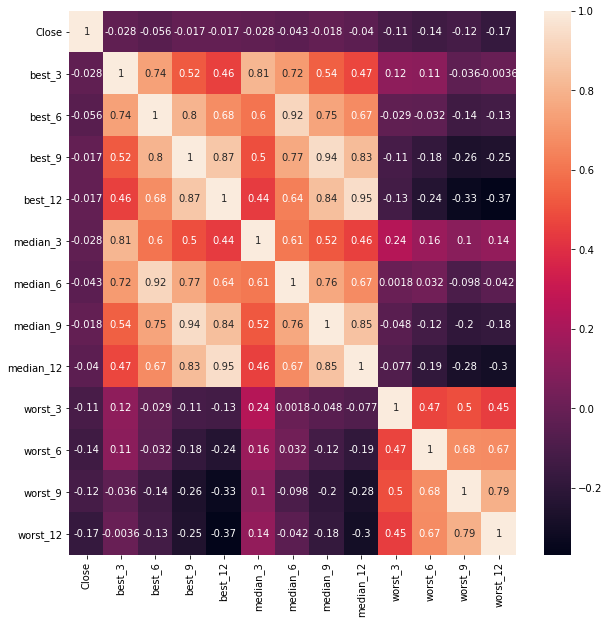

In [72]:
import seaborn as sns
returns = pd.merge(KOSPI_return, new_data, left_index=True, right_index=True, how = 'inner').dropna()

plt.figure(figsize=(15,15))
sns.heatmap(data = returns.corr(), annot=True)

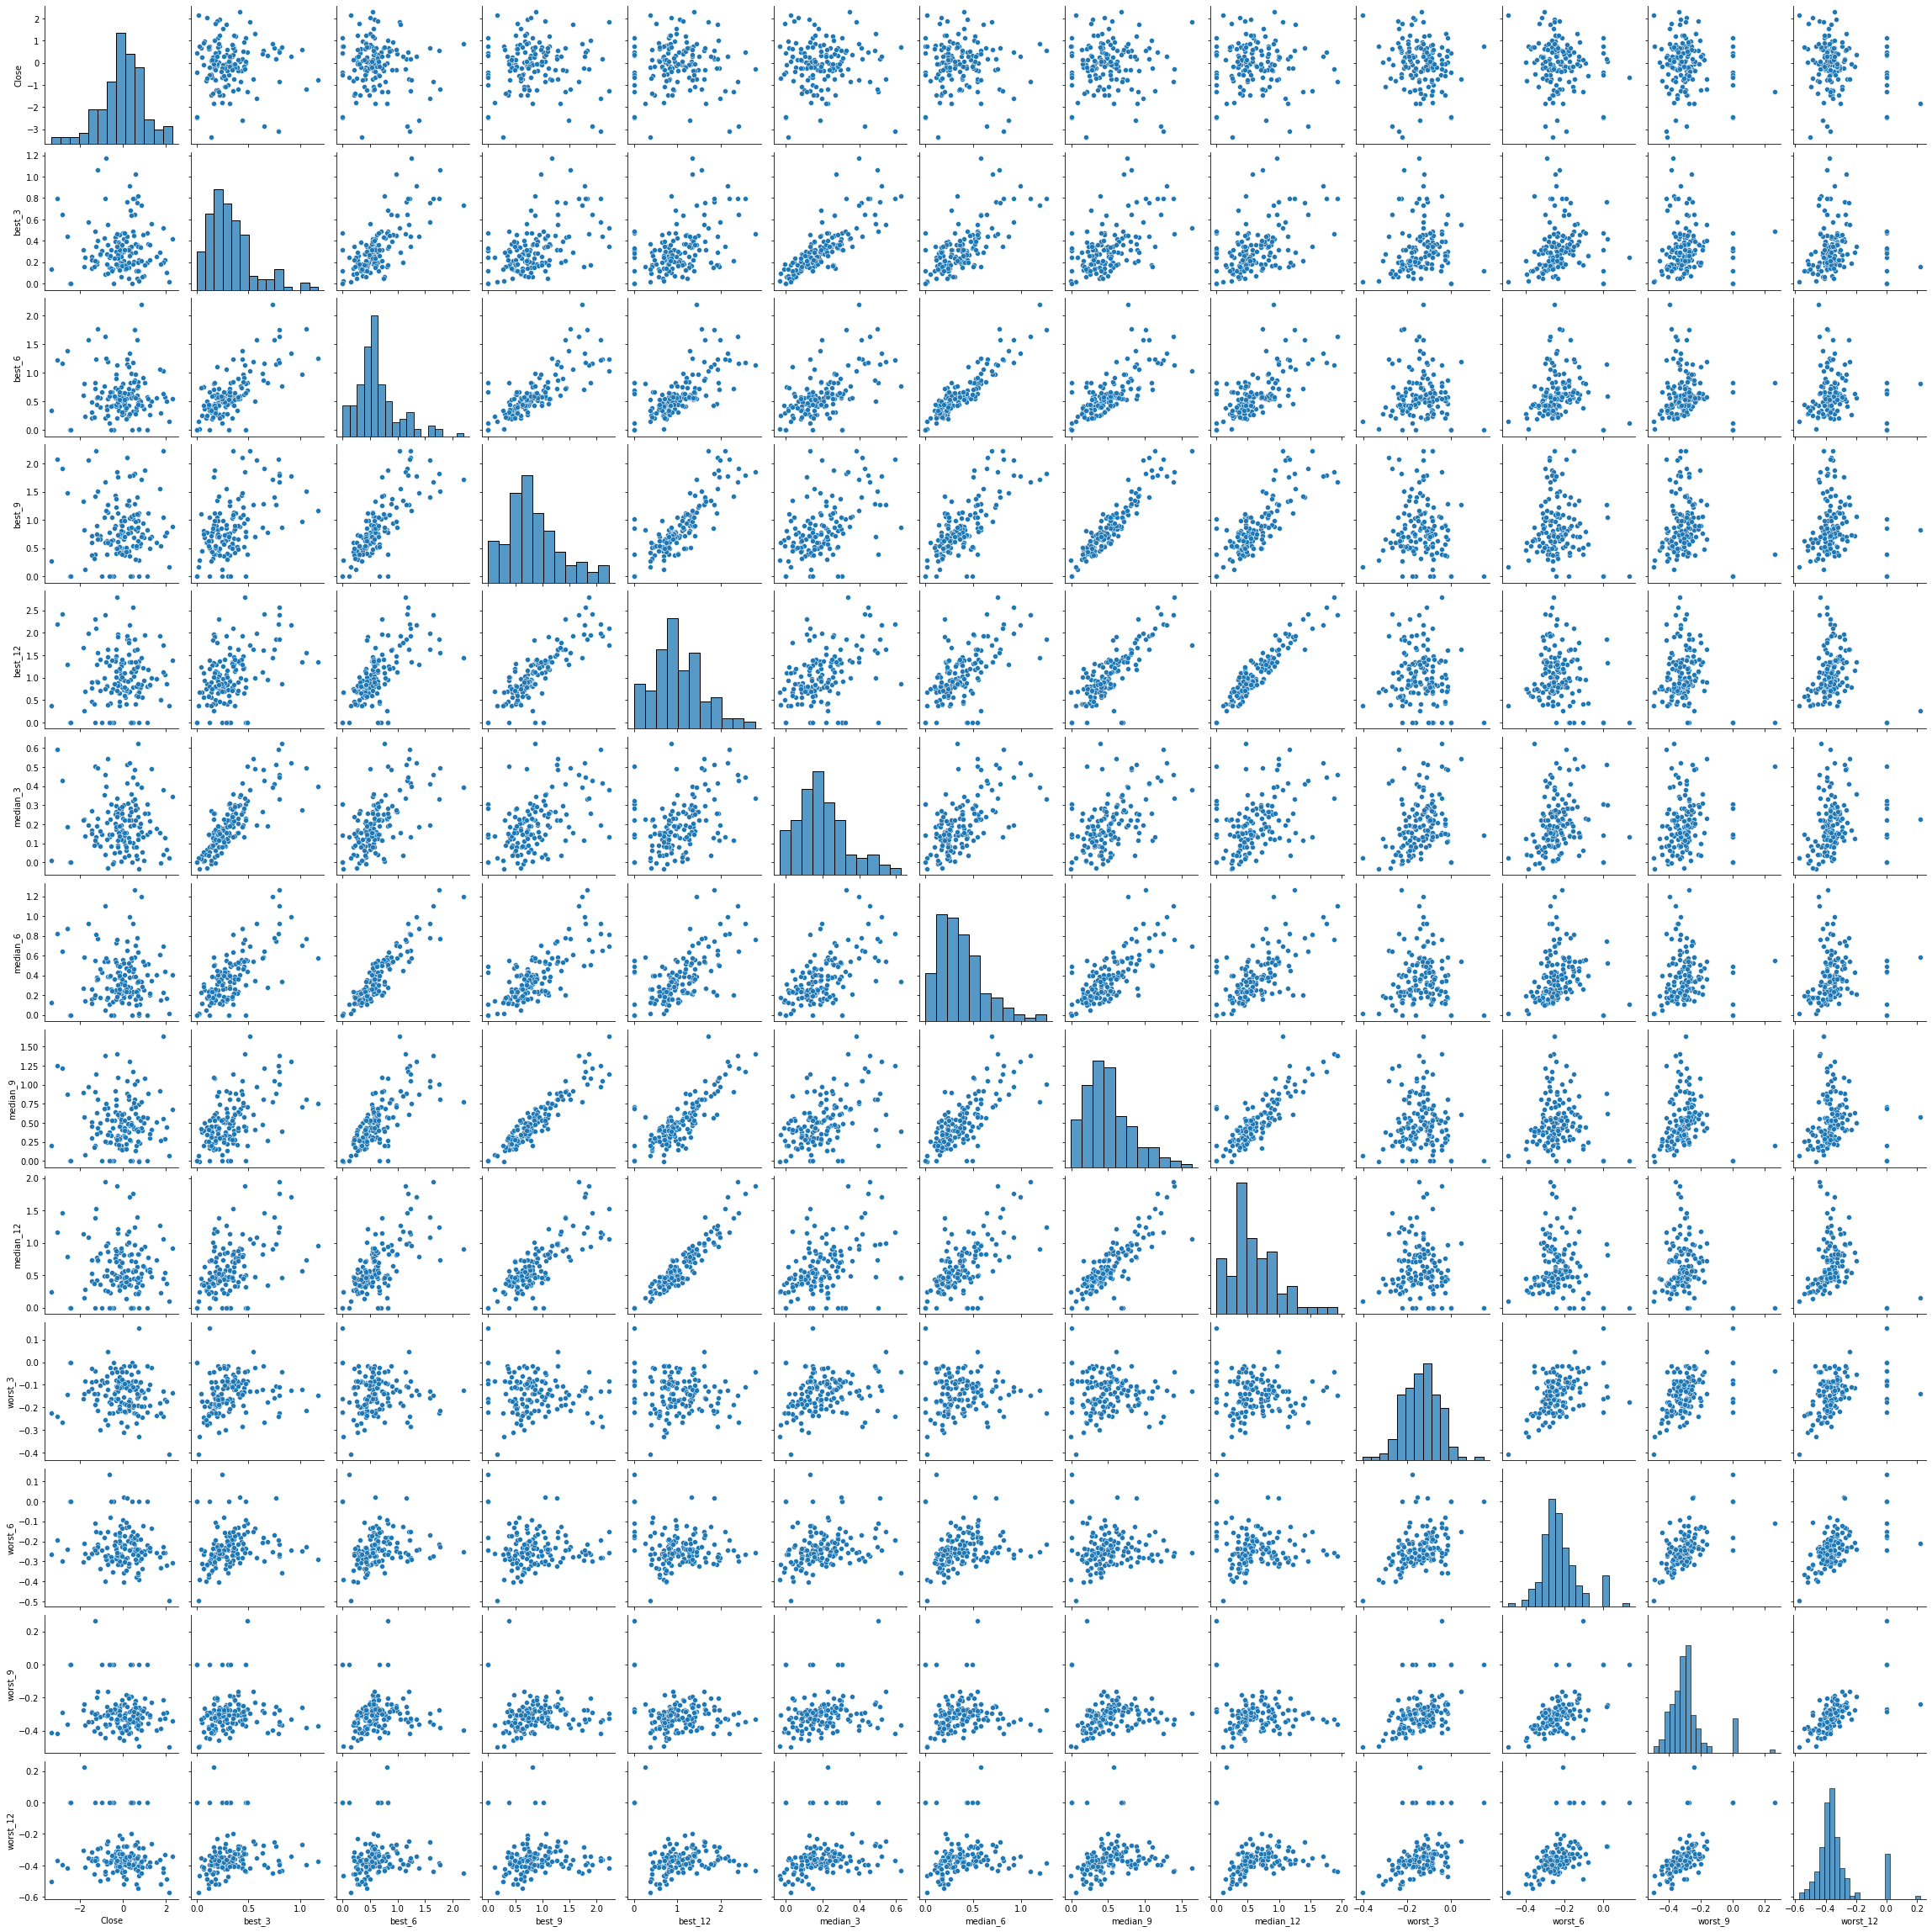

In [73]:
sns.pairplot(returns) 

plt.show() 

5. 12개 포트폴리오 수익률과 KOSPI 지수 수익률의 누적수익률 그래프를 그리시오.

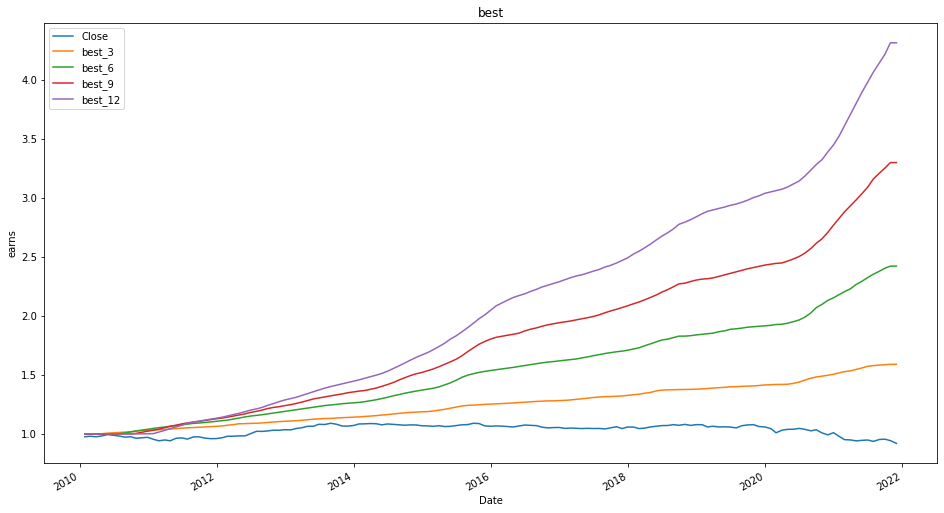

In [104]:
new_data1=pd.DataFrame({'best_3':new_data['best_3'],'best_6':new_data['best_6'],'best_9':new_data['best_9'],'best_12':new_data['best_12']})
k1 = pd.merge(KOSPI_return, new_data1, left_index=True, right_index=True, how = 'inner').dropna()

k1_cumr = (1+k1/100).cumprod()
k1_cumr

k1_cumr.plot(figsize=(16,9)) 
plt.title('best') 
plt.xlabel('Date') 
plt.ylabel('earns') 
plt.legend()

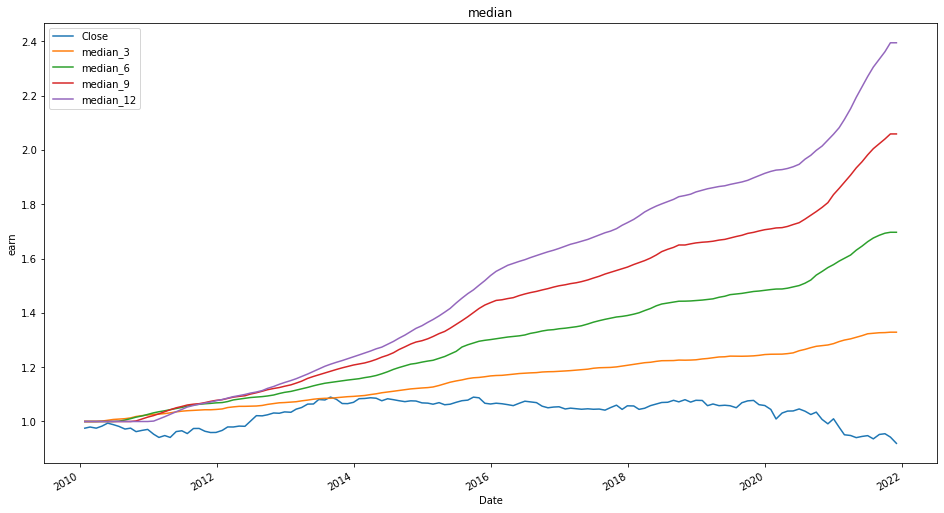

In [105]:
new_data2=pd.DataFrame({'median_3':new_data['median_3'],'median_6':new_data['median_6'],'median_9':new_data['median_9'],'median_12':new_data['median_12']})
k2 = pd.merge(KOSPI_return, new_data2, left_index=True, right_index=True, how = 'inner').dropna()

k2_cumr = (1+k2/100).cumprod()
k2_cumr

k2_cumr.plot(figsize=(16,9)) 
plt.title('median') 
plt.xlabel('Date') 
plt.ylabel('earn') 
plt.legend()

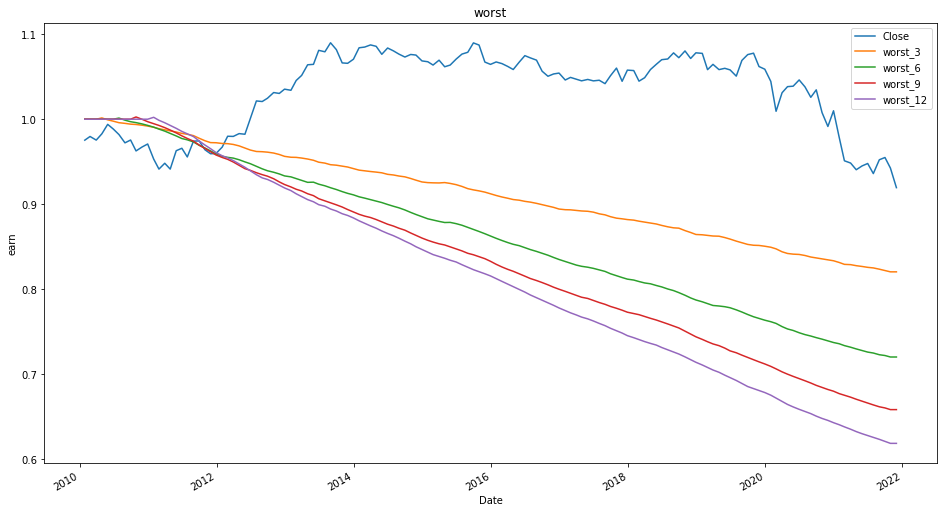

In [106]:
new_data3=pd.DataFrame({'worst_3':new_data['worst_3'],'worst_6':new_data['worst_6'],'worst_9':new_data['worst_9'],'worst_12':new_data['worst_12']})
k3 = pd.merge(KOSPI_return, new_data3, left_index=True, right_index=True, how = 'inner').dropna()

k3_cumr = (1+k3/100).cumprod()
k3_cumr

k3_cumr.plot(figsize=(16,9)) 
plt.title('worst') 
plt.xlabel('Date') 
plt.ylabel('earn') 
plt.legend()

6. 위 결과를 바탕으로 최적의 투자전략을 제시하고, 그 근거를 설명하시오.

7. 모멘텀 기간의 변화에 따른 portfolio의 누적수익률 추이르르 그래프로 출력하시오.

In [78]:
def MeanEarn_best20(new_data,momentumDF,columname,idx):
    top20=momentumDF.loc[idx].sort_values(ascending=False).index[20:40]
    sum = 0.0
    for tStock in top20:
        value = momentumDF.loc[idx:].iloc[1].loc[tStock]
        if np.isnan(value) == False:
            sum += value

        mean= sum/20 
        new_data.loc[idx,columname]=mean
    
    return new_data

def MeanEarn_median20(new_data, momentumDF,columname,idx):
    
    median = len(momentumDF) // 2
    median20=momentumDF.loc[idx].sort_values(ascending=False).index[median-10:median+10] 
    sum = 0.0
    for tStock in median20:
        value = momentumDF.loc[idx:].iloc[1].loc[tStock]
        if np.isnan(value) == False:
            sum += value

    mean= sum/20 
    new_data.loc[idx,columname]=mean
        
    return new_data

def MeanEarn_worst20(new_data, momentumDF,columname,idx):

    worst20=momentumDF.loc[idx].sort_values(ascending=True).index[30:50] 

    sum = 0.0
    for tStock in worst20:
        value = momentumDF.loc[idx:].iloc[1].loc[tStock]
        if np.isnan(value) == False:
            sum += value

    mean= sum/20.0
    new_data.loc[idx,columname]=mean
    
    return new_data

In [95]:
def get_portfolio(momentum):
    new_data = pd.DataFrame(0,columns = ['best', 'median', 'worst'],index = stocks_month.index)
    
    for idx, row in stocks_month.iterrows():
        if idx >= tStartDay and idx < tEndDay:
            new_data = MeanEarn_best20(new_data, momentum, 'best' ,idx)
            new_data = MeanEarn_median20(new_data, momentum, 'median',idx)
            new_data = MeanEarn_worst20(new_data, momentum, 'worst',idx)
            
    return new_data

In [108]:
def plot_cum_return_all(new_data, i, figsize=(8,4)):
    k1 = pd.merge(KOSPI_return, new_data, left_index=True, right_index=True, how = 'inner').dropna()
    
    k1_cumr = (1+k1/100).cumprod()

    k1_cumr.plot(figsize=figsize) 
    plt.title('K='+str(i)) 
    plt.xlabel('Date') 
    plt.ylabel('earn') 
    plt.legend();

In [109]:
momentum = []

for i in range(2,13):
    momentum.append(stocks_month_close.pct_change(periods = i))

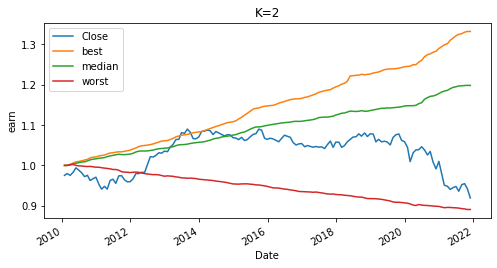

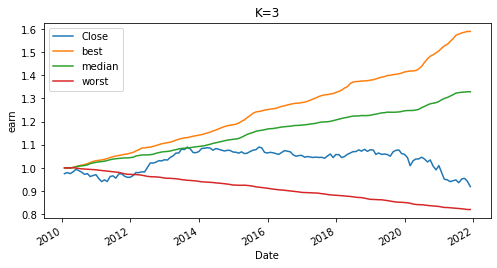

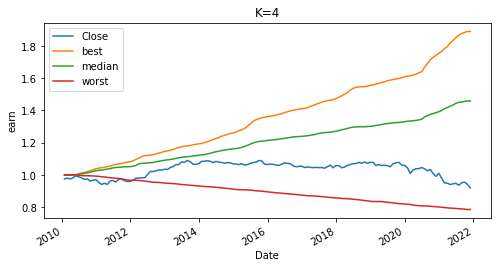

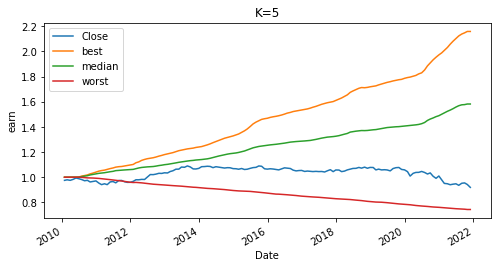

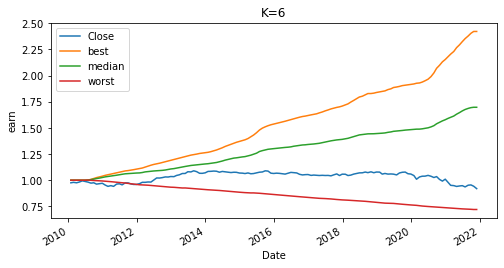

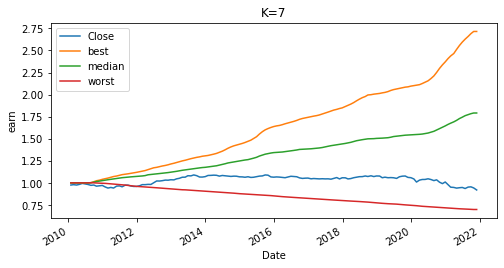

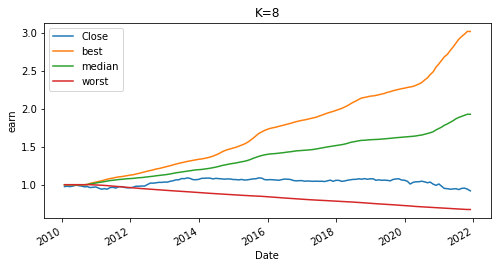

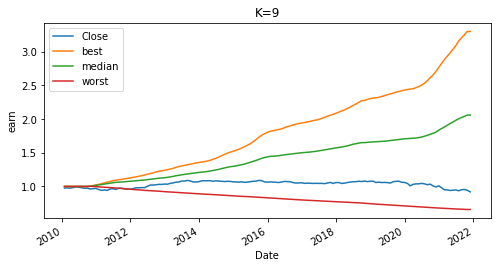

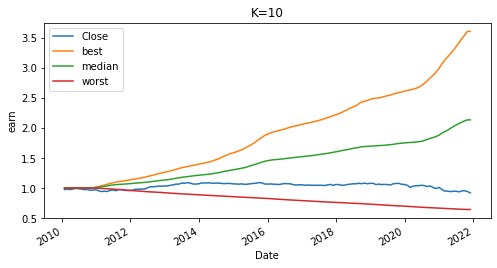

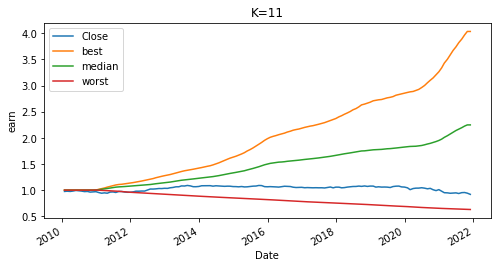

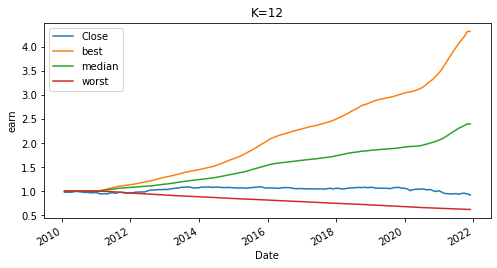

In [110]:
import warnings
warnings.filterwarnings("ignore")

for i in range(2, 13):
    df = get_portfolio(momentum[i-2])
    plot_cum_return_all(df, i)

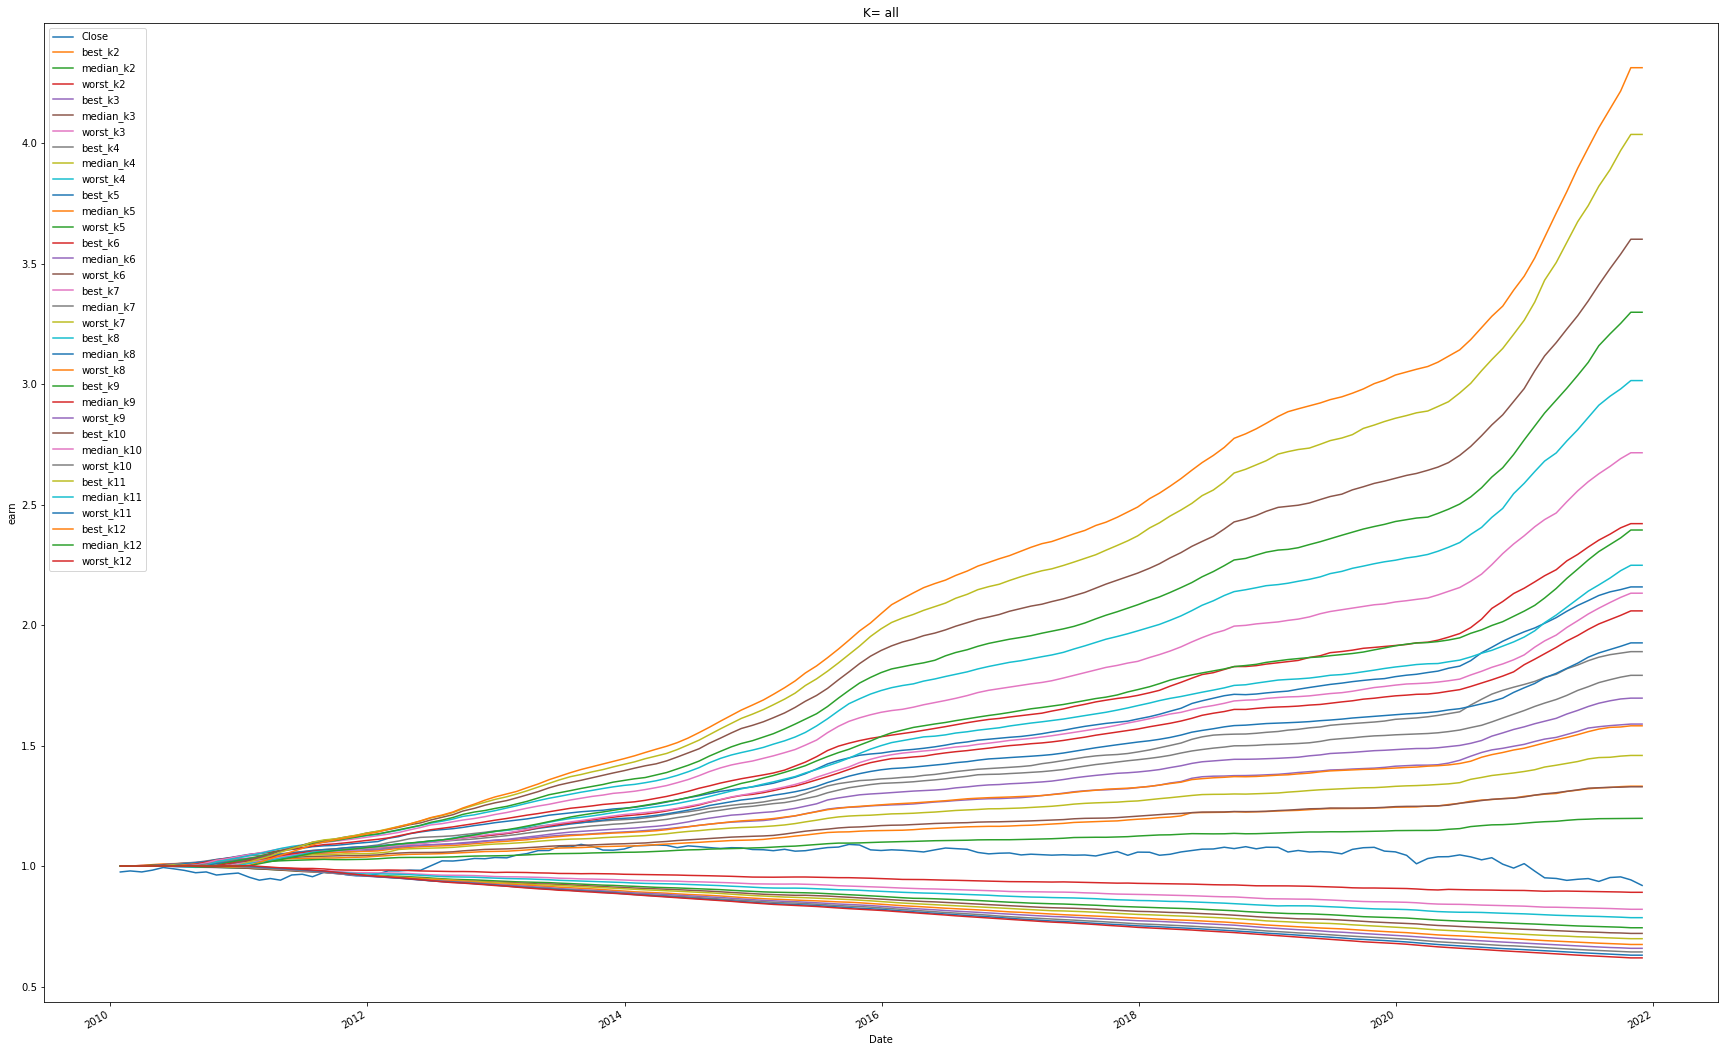

In [112]:
df_all = pd.DataFrame([])
for i in range(2, 13):
    best_k = "best_k" + str(i)
    median_k = "median_k" + str(i)
    worst_k = "worst_k" + str(i)
    
    new_df = get_portfolio(momentum[i-2])
    new_df.columns = [best_k, median_k, worst_k]
    df_all = pd.concat([df_all,new_df], axis=1)
plot_cum_return_all(df_all, ' all', figsize=(30, 20))

8. 위 33개의 전략의 성과를 KOSPI와 대비하여 비교하여 설명하시오. 